In [15]:
import numpy as np
import pandas as pd

In [16]:
datawith = pd.read_csv('CleanTrainData.csv')
datawith.loc[datawith['Married']=="Yes",'Married']=1
datawith.loc[datawith['Married']=='No','Married']=0
datawith.loc[datawith['Education']=="Graduate",'Education']=1
datawith.loc[datawith['Education']=='Not Graduate','Education']=0
datawith.loc[datawith['Self_Employed']=="Yes",'Self_Employed']=1
datawith.loc[datawith['Self_Employed']=='No','Self_Employed']=0
datawith.loc[datawith['Property_Area']=="Urban",'Property_Area']=0
datawith.loc[datawith['Property_Area']=='Semiurban','Property_Area']=1
datawith.loc[datawith['Property_Area']=='Rural', 'Property_Area']=2
datawith = datawith.drop('Unnamed: 0', axis=1)
datawith.to_csv('cleandataformodel.csv')
datawith.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1


In [17]:
X1 = datawith.drop("Loan_Status", axis=1)
y1 = datawith["Loan_Status"]
print(X1.shape, y1.shape)

(614, 10) (614,)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=1, stratify=y1)
X1_scaler = StandardScaler().fit(X1_train)
X1_train_scaled = X1_scaler.transform(X1_train)
X1_test_scaled = X1_scaler.transform(X1_test)


# Step 1: Label-encode data set
label1_encoder = LabelEncoder()
label1_encoder.fit(y1_train)
encoded_y1_train = label1_encoder.transform(y1_train)
encoded_y1_test = label1_encoder.transform(y1_test)

# Step 2: Convert encoded labels to one-hot-encoding
y1_train_categorical = to_categorical(encoded_y1_train)
y1_test_categorical = to_categorical(encoded_y1_test)

In [19]:
from keras.models import Sequential
from keras.layers import Dense

model1 = Sequential()
model1.add(Dense(units=40, activation='relu', input_dim=10))
model1.add(Dense(units=40, activation='relu'))
model1.add(Dense(units=2, activation='softmax'))

Train on 460 samples, validate on 154 samples
Epoch 1/200
 - 0s - loss: 0.7464 - acc: 0.3478 - val_loss: 0.7147 - val_acc: 0.4675
Epoch 2/200
 - 0s - loss: 0.6961 - acc: 0.4804 - val_loss: 0.6789 - val_acc: 0.5844
Epoch 3/200
 - 0s - loss: 0.6641 - acc: 0.6739 - val_loss: 0.6544 - val_acc: 0.7078
Epoch 4/200
 - 0s - loss: 0.6417 - acc: 0.7261 - val_loss: 0.6353 - val_acc: 0.7338
Epoch 5/200
 - 0s - loss: 0.6246 - acc: 0.7391 - val_loss: 0.6201 - val_acc: 0.7403
Epoch 6/200
 - 0s - loss: 0.6104 - acc: 0.7391 - val_loss: 0.6061 - val_acc: 0.7468
Epoch 7/200
 - 0s - loss: 0.5976 - acc: 0.7522 - val_loss: 0.5938 - val_acc: 0.7727
Epoch 8/200
 - 0s - loss: 0.5864 - acc: 0.7587 - val_loss: 0.5826 - val_acc: 0.7987
Epoch 9/200
 - 0s - loss: 0.5760 - acc: 0.7652 - val_loss: 0.5725 - val_acc: 0.8052
Epoch 10/200
 - 0s - loss: 0.5664 - acc: 0.7696 - val_loss: 0.5627 - val_acc: 0.8117
Epoch 11/200
 - 0s - loss: 0.5572 - acc: 0.7761 - val_loss: 0.5530 - val_acc: 0.8247
Epoch 12/200
 - 0s - loss: 0

Epoch 97/200
 - 0s - loss: 0.4030 - acc: 0.8326 - val_loss: 0.4255 - val_acc: 0.8506
Epoch 98/200
 - 0s - loss: 0.4024 - acc: 0.8370 - val_loss: 0.4256 - val_acc: 0.8506
Epoch 99/200
 - 0s - loss: 0.4021 - acc: 0.8370 - val_loss: 0.4260 - val_acc: 0.8506
Epoch 100/200
 - 0s - loss: 0.4015 - acc: 0.8370 - val_loss: 0.4261 - val_acc: 0.8506
Epoch 101/200
 - 0s - loss: 0.4014 - acc: 0.8348 - val_loss: 0.4257 - val_acc: 0.8506
Epoch 102/200
 - 0s - loss: 0.4010 - acc: 0.8326 - val_loss: 0.4261 - val_acc: 0.8506
Epoch 103/200
 - 0s - loss: 0.4004 - acc: 0.8348 - val_loss: 0.4255 - val_acc: 0.8506
Epoch 104/200
 - 0s - loss: 0.4000 - acc: 0.8370 - val_loss: 0.4263 - val_acc: 0.8506
Epoch 105/200
 - 0s - loss: 0.3997 - acc: 0.8370 - val_loss: 0.4261 - val_acc: 0.8506
Epoch 106/200
 - 0s - loss: 0.3993 - acc: 0.8348 - val_loss: 0.4261 - val_acc: 0.8506
Epoch 107/200
 - 0s - loss: 0.3988 - acc: 0.8370 - val_loss: 0.4260 - val_acc: 0.8506
Epoch 108/200
 - 0s - loss: 0.3991 - acc: 0.8370 - val_lo

Epoch 193/200
 - 0s - loss: 0.3685 - acc: 0.8435 - val_loss: 0.4326 - val_acc: 0.8442
Epoch 194/200
 - 0s - loss: 0.3683 - acc: 0.8435 - val_loss: 0.4330 - val_acc: 0.8442
Epoch 195/200
 - 0s - loss: 0.3677 - acc: 0.8391 - val_loss: 0.4336 - val_acc: 0.8442
Epoch 196/200
 - 0s - loss: 0.3672 - acc: 0.8391 - val_loss: 0.4341 - val_acc: 0.8442
Epoch 197/200
 - 0s - loss: 0.3670 - acc: 0.8391 - val_loss: 0.4346 - val_acc: 0.8442
Epoch 198/200
 - 0s - loss: 0.3670 - acc: 0.8391 - val_loss: 0.4346 - val_acc: 0.8442
Epoch 199/200
 - 0s - loss: 0.3662 - acc: 0.8413 - val_loss: 0.4336 - val_acc: 0.8442
Epoch 200/200
 - 0s - loss: 0.3660 - acc: 0.8435 - val_loss: 0.4340 - val_acc: 0.8442
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


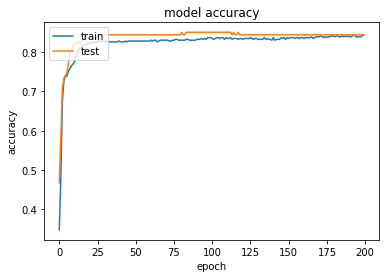

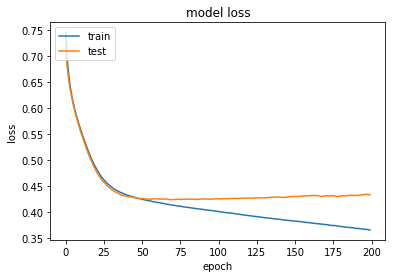

In [20]:
model1.compile(optimizer='SGD', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
history = model1.fit(
    X1_train_scaled,
    y1_train_categorical,
    epochs=200,
    shuffle=True,
    verbose=2,validation_data=(X1_test_scaled,y1_test_categorical))
	
import matplotlib.pyplot as plt
model1.metrics_names
print(history.history.keys())
#  "Accuracy" plot
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
# 'loss' plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [21]:
model1_loss, model1_accuracy = model1.evaluate(X1_test_scaled, y1_test_categorical, verbose=2)
print(f"Normal Neural Network with data - Loss: {model1_loss}, Accuracy: {model1_accuracy}")


Normal Neural Network with data - Loss: 0.4339635449570495, Accuracy: 0.8441558457040167


In [22]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 40)                440       
_________________________________________________________________
dense_5 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 82        
Total params: 2,162
Trainable params: 2,162
Non-trainable params: 0
_________________________________________________________________


In [23]:
predictions = model1.predict_classes(X1_test_scaled)
predictions

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, predictions))

             precision    recall  f1-score   support

          0       0.96      0.52      0.68        48
          1       0.82      0.99      0.90       106

avg / total       0.86      0.84      0.83       154



In [25]:
from sklearn.externals import joblib
joblib.dump(X1_scaler, 'model_scaler.pkl') 


['model_scaler.pkl']

In [26]:
model1.save("mortgage_model_trained.h5")